In [1]:
import numpy as np
from mean_average_precision import MetricBuilder

In [9]:
# [xmin, ymin, xmax, ymax, class_id, difficult, crowd]
gt = np.array([
    [439, 157, 556, 241, 0, 0, 0],
    [437, 246, 518, 351, 0, 0, 0],
    [515, 306, 595, 375, 0, 0, 0],
    [407, 386, 531, 476, 0, 0, 0],
    [544, 419, 621, 476, 0, 0, 0],
    [609, 297, 636, 392, 0, 0, 0]
])

# [xmin, ymin, xmax, ymax, class_id, confidence]
preds = np.array([
    [429, 219, 528, 247, 0, 0.460851],
    [433, 260, 506, 336, 0, 0.269833],
    [518, 314, 603, 369, 0, 0.462608],
    [592, 310, 634, 388, 0, 0.298196],
    [403, 384, 517, 461, 0, 0.382881],
    [405, 429, 519, 470, 0, 0.369369],
    [433, 272, 499, 341, 0, 0.272826],
    [413, 390, 515, 459, 0, 0.619459]
])


In [61]:
# [xmin, ymin, xmax, ymax, class_id, difficult, crowd]
gt = np.array([
    [161, 204, 798, 950, 0, 0, 0]
])

# [xmin, ymin, xmax, ymax, class_id, confidence]
preds = np.array([
    [0, 0, 1024, 1024, 0, 0.75],
    [0, 0, 1024, 1024, 0, 0.75]
])

In [62]:
# print list of available metrics
print(MetricBuilder.get_metrics_list())

# create metric_fn
metric_fn = MetricBuilder.build_evaluation_metric("map_2d", async_mode=True, num_classes=1)

# add some samples to evaluation
for i in range(10):
    metric_fn.add(preds, gt)

['map_2d']


In [64]:
# compute PASCAL VOC metric
print(f"VOC PASCAL mAP: {metric_fn.value(iou_thresholds=0.1, recall_thresholds=np.arange(0., 1.1, 0.1))['mAP']}")

# compute PASCAL VOC metric at the all points
print(f"VOC PASCAL mAP in all points: {metric_fn.value(iou_thresholds=0.1)['mAP']}")

# compute metric COCO metric
print(f"COCO mAP: {metric_fn.value(iou_thresholds=np.arange(0.5, 1.0, 0.05), recall_thresholds=np.arange(0., 1.01, 0.01), mpolicy='soft')['mAP']}")


VOC PASCAL mAP: 0.6865981221199036
VOC PASCAL mAP in all points: 0.6664484143257141
COCO mAP: 0.0


<BarContainer object of 4 artists>

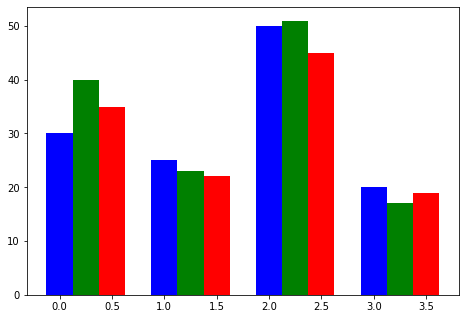

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.set_ylabel('mAP')
ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend(labels=['Men', 'Women'])

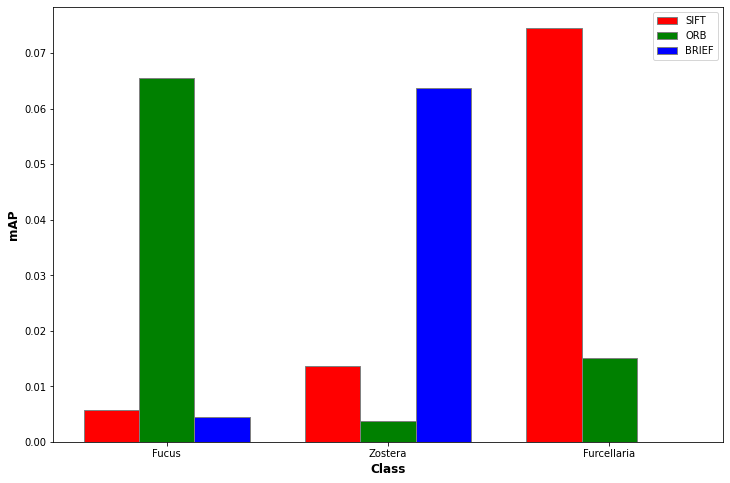

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
SIFT = [0.0058, 0.0137, 0.0746]
ORB = [0.0656, 0.0038, 0.0151]
BRIEF = [0.0045, 0.0638, 0]

# Set position of bar on X axis
br1 = np.arange(len(SIFT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, SIFT, color ='r', width = barWidth,
        edgecolor ='grey', label ='SIFT')
plt.bar(br2, ORB, color ='g', width = barWidth,
        edgecolor ='grey', label ='ORB')
plt.bar(br3, BRIEF, color ='b', width = barWidth,
        edgecolor ='grey', label ='BRIEF')

# Adding Xticks
plt.xlabel('Class', fontweight ='bold', fontsize = 12)
plt.ylabel('mAP', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(SIFT))],
        ['Fucus', 'Zostera', 'Furcellaria'])

plt.legend()
plt.show()